<a href="https://colab.research.google.com/github/wonyoung-ji/asiae_edu/blob/master/NLP/200910%20%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%98%A4%EB%8A%98%EC%9D%98%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 패키지설치

In [ ]:
# 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작

In [1]:
! sudo apt-get install g++ openjdk-7-jdk #Install Java 1.7+ 
#!sudo apt-get install python-dev; pip install konlpy # Python 2.x 
!sudo apt-get install python3-dev; pip3 install konlpy # Python 3.x 
!sudo apt-get install curl 
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
     |████████████████████████████████| 19.4MB 5.8MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 3.8MB 38.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Reading package 

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import requests
from bs4 import BeautifulSoup as bs

## 웹크롤링을 이용한 데이터 수집

In [5]:
# 오늘의집 커뮤니티 리뷰가져오기
def raw_reviews(num):
  content = []
  # url 생성
  url='https://ohou.se/questions?affect_type=Home&affect_id=0&page='
  for num in range(num):
    page=str(num)
    new_url=url + page
    # 웹크롤링
    html=requests.get(new_url).text
    soup=bs(html,'html.parser')
    body = soup.find_all('article',class_='questions-item')
    for b in body:
       p_tag = b.find_all('p')
       for p in p_tag:
         content += [p.text]
  return content  

In [9]:
import pandas as pd
# 약 3주간의 리뷰
reviews=pd.DataFrame(raw_reviews(560))

In [10]:
reviews.columns=['content']
reviews

,content
0,암막커튼을 설치하려고하는데 무슨 색이 좋을까요 ??혹시 좋은 제품있으시면 추천해주세...
1,안녕하세요~ 신혼집 인테리어를 하다 벽지 선택에 고민이 생겨 질문드려요~안방과 옷방...
2,옷이 정말 많은데 안에 침대를 넣으려고 해요\r파티션으로 분리하고 싶은데 무슨 좋은...
3,요즘 유행하는 씽크대 폭이나 넓이를 알고 싶네요?
4,\r\r이 공간에 뭘 둘지 오래 고민중이에요!\r가벽과 책상은 이동 가능해서 가로폭...
...,...
2795,안녕하세요생애 처음으로 독립하는데요가구 배치는 어떻게 하고..큰창에는 커튼이 좋을지...
2796,어느 한 카페를 들렀다가 저의 취향을 찾게되었습니다. 브라운&스틸&그린이런가구는 어...
2797,"첫번째 사진 보시면, 벽에 실외기 구멍도 하나 있구요! 창문 위로 커튼박스에도 약간..."
2798,전원주택입니다! 바닥은 장판만 가능하대요~창문은 흰색인데 문 색깔은 주황빛이 많이 ...


In [11]:
reviews.to_csv("ohou_reviews.csv", mode='w')

## 데이터 전처리

In [16]:
from konlpy.tag import Mecab
mecab=Mecab()
from konlpy.tag import Okt
okt=Okt()

reviews['content'] = reviews['content'].str.replace("[^가-힣ㄱ-ㅎㅏ-ㅣ|\\s]",' ')                       # 한글 이외의 단어 제외
reviews['content'] = reviews['content'].apply(lambda x:' '.join([ w for w in str(x).split() if len(w)>1]))   # 1글자 삭제
tokenized_doc = reviews['content'].apply(lambda x: okt.pos(x, stem=True))                               # 품사태깅

In [31]:
tokenized_doc[0]

[('암', 'Modifier'),
 ('막', 'Noun'),
 ('커튼', 'Noun'),
 ('을', 'Josa'),
 ('설치', 'Noun'),
 ('하다', 'Verb'),
 ('무슨', 'Noun'),
 ('색', 'Noun'),
 ('이', 'Josa'),
 ('좋다', 'Adjective'),
 ('혹시', 'Noun'),
 ('좋다', 'Adjective'),
 ('제품', 'Noun'),
 ('있다', 'Adjective'),
 ('추천', 'Noun'),
 ('해주다', 'Verb')]

In [32]:
stop_pos='Determiner Adverb Conjunction Exclamation Josa PreEomi Eomi Suffix Punctuation Foreign Alpha Number Unknown KoreanParticle Hashtag ScreenName Email URL]'.split(' ')
          
stop_word = ['거','게','중','제','정도','생각','정도','수','방법','데','예정','만','추천','쪽','검색',
             '번','때','안녕','곳','개','저','이번','등','저희','뭐','협','의견','것','인테리어','고민','집',
             '위','아래','옆','오른쪽','왼쪽','걸로','안','참고','전','둘','뭔가','분','방','부탁드리다',
             '오늘','저기','맘','월','이거','저거','건가요','여러분','무엇','등등','이건','말씀','하다','있다','이다']

words=[]
for tags in tokenized_doc:
  word = []
  for tag in tags:
    if tag[1] not in stop_pos:
      if tag[0] not in stop_word:
        word.append(tag[0])
  words.append(' '.join(word))
okt_tokenized_doc=words
okt_tokenized_doc[:4]

['암 막 커튼 설치 무슨 색 좋다 혹시 좋다 제품 해주다',
 '안녕하다 신혼집 벽지 선택 생기다 질문 드리다 안방 옷방 벽지 선택 일단 후보 시스 리얼 페인 팅 그레이 시스 리얼 페인 팅 크림 요 안방 채도 낮추다 싶다 레이지 침대 월넛색 침구 들이다 아이보리 크림 색 같다 전체 조화 되다 누런 분위기 아니다 싶다 도움 요청 안방 레이지 해도 되다 요 안방 색 정 다른 색 옷방 해 조언 구합 니',
 '옷 정말 많다 침대 넣다 해 파티션 분리 싶다 무슨 좋다 없다',
 '요즘 유행 크다 폭 넓이 알 싶다']

## 워드클라우드
* 웹크롤링에서 등장한 명사만 취급하여 만들기로 한다.

In [33]:
tokenized_noun_doc = reviews['content'].apply(lambda x: mecab.nouns(x))

In [34]:
noun_contents = []
stop_word = ['거','게','중','제','정도','생각','정도','수','방법','데','예정','만','추천','쪽','검색',
             '번','때','안녕','곳','개','저','이번','등','저희','뭐','협','의견','것','인테리어','고민','집',
             '위','아래','옆','오른쪽','왼쪽','걸로','안','참고','전','둘','뭔가','분','방','부탁',
             '오늘','저기','맘','월','이거','저거','건가요','여러분','무엇','등등','이건','말씀']

for words in tokenized_noun_doc:
  for word in words:
    if word not in stop_word:
      noun_contents.append(word)
noun_contents[:10]

['암막', '커튼', '설치', '색', '제품', '신혼집', '벽지', '선택', '질문', '안방']

In [35]:
from collections import Counter
count = Counter(noun_contents)
words = dict(count.most_common())

words

{'침대': 1069,
 '책상': 625,
 '가구': 604,
 '공간': 552,
 '사진': 551,
 '배치': 528,
 '벽지': 451,
 '색': 446,
 '커튼': 425,
 '거실': 425,
 '화이트': 392,
 '벽': 354,
 '구조': 321,
 '이사': 305,
 '창문': 288,
 '색상': 286,
 '주방': 268,
 '식탁': 264,
 '문': 263,
 '사용': 251,
 '바닥': 247,
 '설치': 244,
 '사이즈': 243,
 '부분': 239,
 '테이블': 234,
 '옷장': 227,
 '조언': 225,
 '베란다': 217,
 '러그': 216,
 '화장대': 215,
 '하나': 214,
 '의자': 210,
 '느낌': 209,
 '위치': 203,
 '행거': 198,
 '티비': 193,
 '쇼파': 191,
 '책장': 179,
 '전체': 178,
 '냉장고': 178,
 '수납': 174,
 '구매': 172,
 '거울': 170,
 '감사': 169,
 '제품': 166,
 '흰색': 163,
 '가능': 162,
 '페인트': 162,
 '시트': 161,
 '우드': 161,
 '소파': 156,
 '매트리스': 149,
 '어디': 147,
 '아파트': 146,
 '옷': 142,
 '선반': 140,
 '가로': 139,
 '때문': 138,
 '수납장': 137,
 '블라인드': 136,
 '자리': 136,
 '톤': 128,
 '장판': 126,
 '천장': 126,
 '시공': 126,
 '밑': 126,
 '타일': 125,
 '상태': 124,
 '화장실': 123,
 '원룸': 122,
 '활용': 121,
 '고수': 119,
 '몰딩': 118,
 '세로': 118,
 '걸': 118,
 '가요': 117,
 '도배': 117,
 '안방': 116,
 '붙박이장': 116,
 '여기': 112,
 '장': 111,
 '그레이': 111,
 '분위기'

In [36]:
from wordcloud import WordCloud 

%matplotlib inline       
import matplotlib
from IPython.display import set_matplotlib_formats

# set_matplotlib_formats('retina')          # 선명하게
matplotlib.rc('axes',unicode_minus = False)

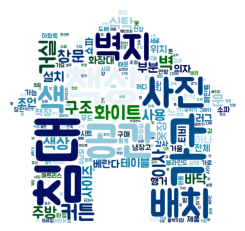

In [37]:
from PIL import Image # 이미지 관련 함수
import numpy as np
mask=np.array(Image.open('/content/gdrive/My Drive/NLP/yellow-house-hi.png'))
font_path='/content/gdrive/My Drive/폰트/BMJUA_ttf.ttf'

wordcloud = WordCloud(font_path=font_path,
                      background_color='white',
                      colormap = "ocean",
                      mask=mask,
                      width=5000, height=5000
                     ).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## bar plot

In [38]:
words_df = pd.DataFrame([words.values()],columns=words.keys()).T
words_df.columns=['num']
words_df

,num
침대,1069
책상,625
가구,604
공간,552
사진,551
...,...
생애,1
요방,1
벌,1
전원주택,1


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

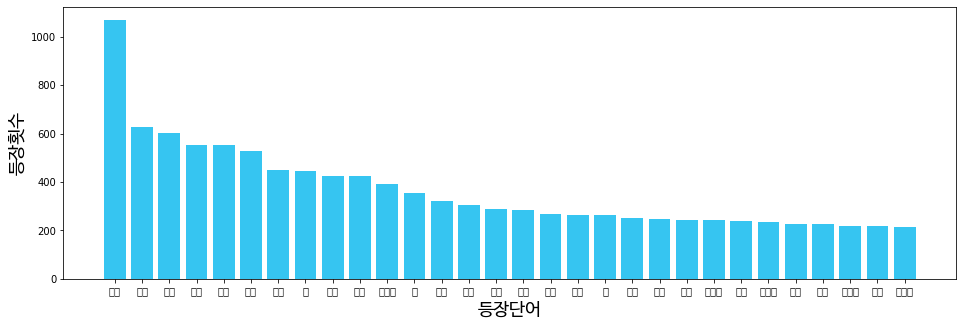

In [39]:
path = '/content/gdrive/My Drive/폰트/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.figure(figsize=(16,5))
plt.bar(words_df[:30].index,words_df['num'][:30],color='#36C5F1')
plt.xlabel("등장단어",fontproperties=fontprop)
plt.ylabel("등장횟수",fontproperties=fontprop)

plt.show()

In [40]:
# # 토큰빈도계산 : CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# #선언
# count_vect = CountVectorizer()
# BoW = count_vect.fit_transform(contents)
# vocab = count_vect.get_feature_names()
# print(vocab)

## LDA

In [41]:
okt_tokenized_doc[:4]

['암 막 커튼 설치 무슨 색 좋다 혹시 좋다 제품 해주다',
 '안녕하다 신혼집 벽지 선택 생기다 질문 드리다 안방 옷방 벽지 선택 일단 후보 시스 리얼 페인 팅 그레이 시스 리얼 페인 팅 크림 요 안방 채도 낮추다 싶다 레이지 침대 월넛색 침구 들이다 아이보리 크림 색 같다 전체 조화 되다 누런 분위기 아니다 싶다 도움 요청 안방 레이지 해도 되다 요 안방 색 정 다른 색 옷방 해 조언 구합 니',
 '옷 정말 많다 침대 넣다 해 파티션 분리 싶다 무슨 좋다 없다',
 '요즘 유행 크다 폭 넓이 알 싶다']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(okt_tokenized_doc)
lda = LatentDirichletAllocation(n_components=3, max_iter=20, learning_method='online')

lda_output = lda.fit_transform(tfidf)

In [43]:
!pip install pyLDAvis

In [44]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)